#**Convolutional Neural Networks applied in MNIST handwritten digit recognition**

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
#Load MNIST dataset
mnist = keras.datasets.mnist

#load split training and testing from MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
##Normalize train pixel values ​​and test images.
training_images = training_images /255.0
test_images = test_images / 255.0

In [5]:
#Build the classification model
model = keras.models.Sequential([
    #add convolutions and max pooling
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),

    #Add the same layers as before.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [8]:
#compile model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1428 - accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0050 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 46s 25m

<Axes: >

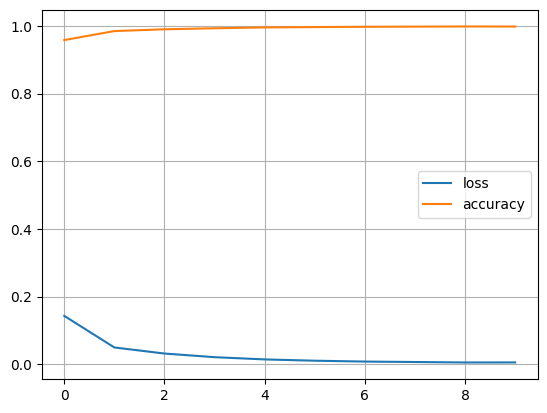

In [9]:
#training the model
history = model.fit(training_images, training_labels, epochs = 10)

#graph training history
pd.DataFrame(history.history).plot(grid = True)

In [10]:
#Evaluar el model en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Perdida en e conjunto de entrenamiento: {loss}')
print(f'Precisión en conjunto de prueba: {accuracy}')

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0057 - accuracy: 0.9979
Perdida en e conjunto de entrenamiento: 0.005660100840032101
Precisión en conjunto de prueba: 0.9979166388511658


In [11]:
#Predict
index = 1

print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: \n {classification.reshape(-1, 1)}')

label: 2
1/1 [==============================] - 0s 99ms/step
Classification: 
 [[8.3627272e-12]
 [6.5242130e-12]
 [1.0000000e+00]
 [1.3152526e-15]
 [1.4423596e-21]
 [1.1558652e-20]
 [1.0662832e-14]
 [8.4066965e-22]
 [1.1006901e-12]
 [3.3842455e-16]]


**When you run the code you will get**

After carrying out the training we are going to execute a code that allows
Visualize convolutions and pooling
This code performs the visualization of convolutions and pooling in
a convolutional neural network (CNN)

In [12]:
#data preparation
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [33]:
#Selection of Images of Interest

#_____Example 1:_______

# FIRST_IMAGE = 3
# SECOND_IMAGE = 10
# THIRD_IMAGE = 25

#_____Example 2:_______
FIRST_IMAGE = 2
SECOND_IMAGE = 5
THIRD_IMAGE = 14

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

1
1
1


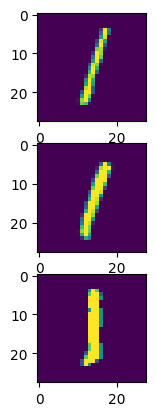

In [34]:
#Image Viewing
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [35]:
#Activation Extraction

layer = 0
filter1 = 0
filter2 = 10


layer_outputs = [layer.output for layer in model.layers]

# Create the activation model
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)


1/1 [==============================] - 0s 45ms/step


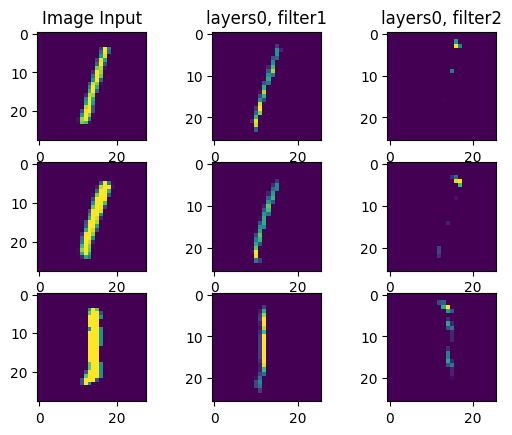

In [36]:
#Visualization of Convolutions
f, axarr = plt.subplots(3,3)

axarr[0, 0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]

axarr[0, 1].set_title('layers' + str(layer) + ', filter1')
axarr[0, 1].imshow(f1[0, :, :, filter1])

axarr[0, 2].set_title('layers' + str(layer) + ', filter2')
axarr[0, 2].imshow(f1[0, :, :, filter2])


axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])
